In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [0]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(newsgroups_train.data)
y = newsgroups_train.target

In [49]:
X.shape

(2034, 34118)

In [0]:
try:
  from MulticoreTSNE import MulticoreTSNE as TSNE
except:
  !pip install MulticoreTSNE
finally:
  from MulticoreTSNE import MulticoreTSNE as TSNE
import os

In [0]:
tsne = TSNE(n_components=2, metric='cosine', n_jobs=os.cpu_count())
X_tsne = tsne.fit_transform(X.todense())

In [52]:
X.shape

(2034, 34118)

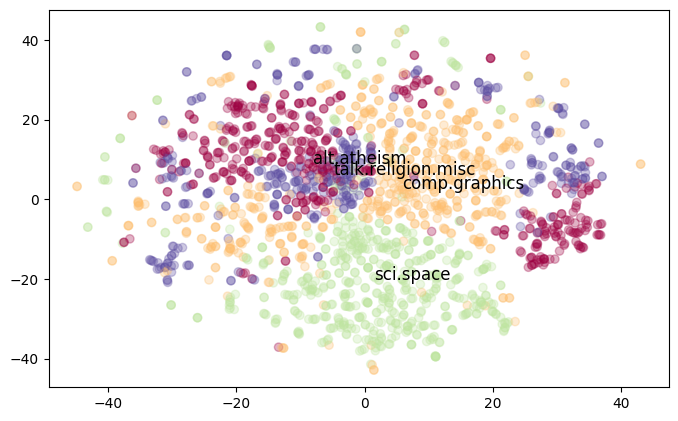

In [32]:
plt.figure(figsize=(8, 5), dpi=100)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='Spectral', alpha=.3)
for label in np.unique(y):
  plt.text(np.median(X_tsne[y==label, 0]),
           np.median(X_tsne[y==label, 1]),
           newsgroups_train.target_names[label],
           fontsize=12)
#plt.axis('equal')
plt.show()

In [0]:
tsne = TSNE(n_components=3, metric='cosine', n_jobs=os.cpu_count())
X_tsne = tsne.fit_transform(X.todense())

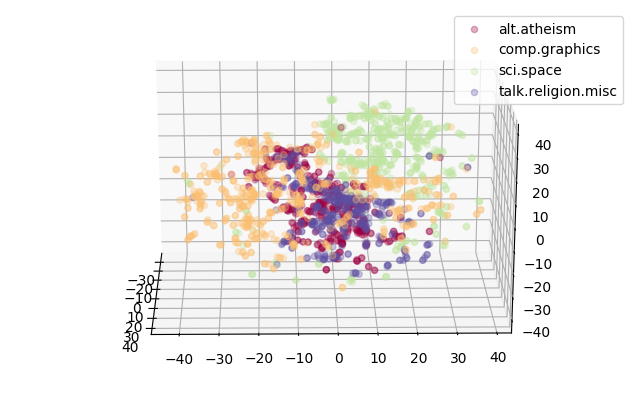

In [34]:
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1, projection='3d')
for label, colour in zip(np.unique(y), plt.cm.Spectral(np.unique(y)/np.max(y))):
  ax.scatter(X_tsne[y==label, 0], X_tsne[y==label, 1],
              X_tsne[y==label, 2], c=np.vstack(colour).T, marker='o',
              alpha=.3, label=newsgroups_train.target_names[label])
ax.legend()

def init():
    ax.view_init(20, 0)
    return fig,

def update(frame):
    angle = frame % 360
    ax.view_init(20, angle)
    return fig,

anim = FuncAnimation(fig, update, frames=range(360), interval=30, init_func=init, blit=True)
anim.save('newsgroups_tsne.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
HTML(anim.to_html5_video())
#anim.save('filename.gif', writer='ffmpeg')

In [0]:
#anim.save('newsgroups_tsne.mp4', fps=30, extra_args=['-vcodec', 'libx264'])


[0.01966659 0.00871472]


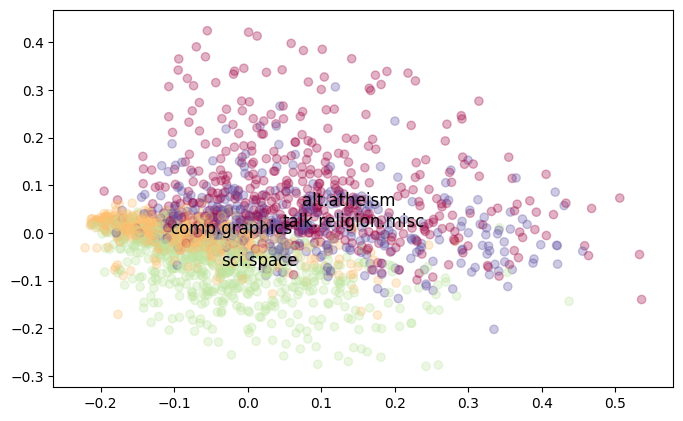

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.todense())

print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5), dpi=100)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Spectral', alpha=.3)
for label in np.unique(y):
  plt.text(np.median(X_pca[y==label, 0]),
           np.median(X_pca[y==label, 1]),
           newsgroups_train.target_names[label],
           fontsize=12)
#plt.legend()
#plt.axis('equal')
plt.show()

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.todense())

print(pca.explained_variance_ratio_)

[0.01966659 0.0087147  0.00673909]


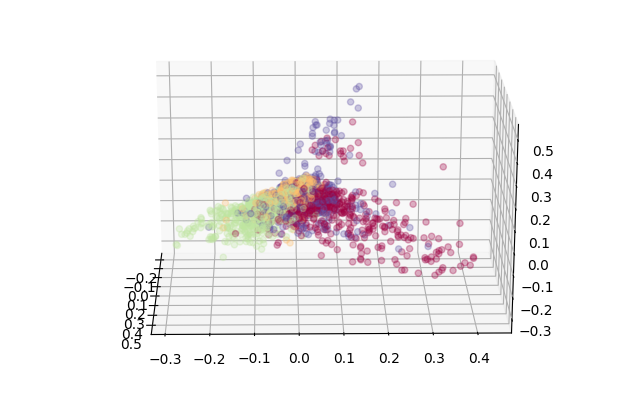

In [37]:
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
           c=y, cmap='Spectral', alpha=.3)

def init():
    ax.view_init(20, 0)
    return fig,

def update(frame):
    angle = frame % 360
    ax.view_init(20, angle)
    return fig,

anim = FuncAnimation(fig, update, frames=range(360), interval=30, init_func=init, blit=True)
# anim.save("newsgroups_pca.mp4", fps=30, extra_args=['-vcodec', 'libx264'])
HTML(anim.to_html5_video())
#anim.save('filename.gif', writer='ffmpeg')

In [0]:
from sklearn.datasets import load_digits
mnist = load_digits()
mnist_tsne = TSNE(n_jobs=os.cpu_count()).fit_transform(mnist.data)
t = mnist.target

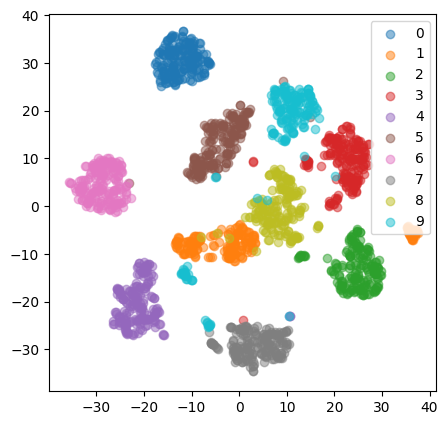

In [0]:
plt.figure(figsize=(5, 5), dpi=100)
for label, colour in zip(np.unique(t), plt.cm.tab10(np.unique(t))):
  plt.scatter(mnist_tsne[t==label, 0], mnist_tsne[t==label, 1],
              c=np.vstack(colour).T, marker='o', alpha=.5, label="%i" % label)
plt.legend()
plt.show()

In [0]:
mnist_tsne = TSNE(n_jobs=os.cpu_count(), n_components=3).fit_transform(mnist.data)
t = mnist.target

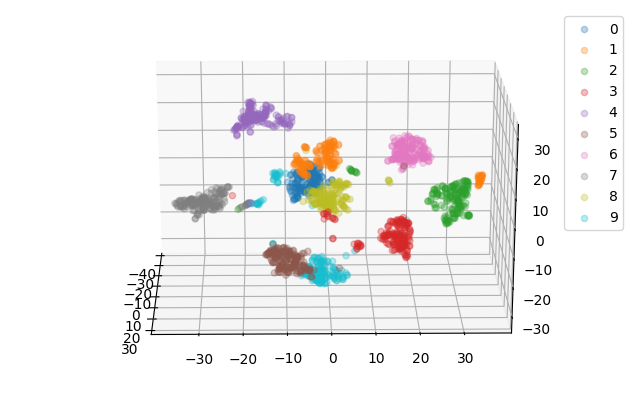

In [0]:
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1, projection='3d')
for label, colour in zip(np.unique(t), plt.cm.tab10(np.unique(t))):
  ax.scatter(mnist_tsne[t==label, 0], mnist_tsne[t==label, 1],
              mnist_tsne[t==label, 2], c=np.vstack(colour).T, marker='o',
              alpha=.3, label="%i" % label)
ax.legend()

def init():
    ax.view_init(20, 0)
    return fig,

def update(frame):
    angle = frame % 360
    ax.view_init(20, angle)
    return fig,

anim = FuncAnimation(fig, update, frames=range(360), interval=30, init_func=init, blit=True)
anim.save("mnist_tsne.mp4", fps=30, extra_args=['-vcodec', 'libx264'])
HTML(anim.to_html5_video())
#anim.save('filename.gif', writer='ffmpeg')


In [40]:
from google.colab import files
# files.download("newsgroups_tsne.mp4")
# files.download("newsgroups_pca.mp4")
# files.download("mnist_tsne.mp4")
!ls


mnist_tsne.mp4	newsgroups_pca.mp4  newsgroups_tsne.mp4  sample_data
